# A Re-evaluation of Growth in the Time of Debt

[DSLC stages]: Data cleaning and pre-processing


## Domain problem formulation

Understanding the relationship between economic growth and debt level (as % of GDP) of countries over time. We will try to understand if there is any relationship and if so, what are the relationship between these two variables.


## Data source overview

Historical public debt data (debt.xls) is downloaded from the International Monetary Fund (IMF) https://www.imf.org/external/datamapper/datasets, <br>
while the gross domestic product (GDP) growth data (growth.csv) downloaded from the World Bank <br> https://data.worldbank.org/indicator/NY.GDP.MKTP.KD.ZG.

The file debt.xls contains the IMF data on the annual debt as a percentage of GDP data from 1800 to 2015 (a total of 216 years) for 189 countries.

The file growth.csv contains the World Bank data from 1960 through to 2021 (a total of 62 years) for 266 countries.

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)


## Step 1: Review background information

- *What does each variable measure?* <br> A data dictionary is presented in the subsection below. 

- *How was the data collected?* <br>  
Debt data is collected by IMF.
There were any ways that IMF collected the data, including statistical handbooks—for example, of the League of Nations and the United Nations—official government publications, and databases complied by researchers and international organizations.

Growth data collected by world bank, specifically under World Bank national accounts data, and OECD National Accounts data files.

- *What are the observational units?* <br> 
for debt.xls it is the yearly debt as % of GDP
for growth.csv it is the Annual percentage growth rate of GDP at market prices based on constant local currency. 

- *Is the data relevant to my project?* <br> 
Yes, to compare the relationship between debt levels and gdp growth rate. 
Since debt level is calculated as a percentage of GDP, we can compare these ratios between countries as our analysis will not skew towards those with high absoulte debt values.

- *What questions do I have and what assumptions am I making?* <br> 

How consistent are the values of debt to gdp over the years.



### Data dictionary

The data dictionary we found on the website at the time of data collection is printed below:



### debt.xls
- rows of 194 countries
- columns of yearly debt as % of GDP from 1800 to 2015

### growth.csv
- rows of 266 countries
- columns of yearly GDP annual growth from 1960 to 2021


## Step 2: Loading in the data




In [2]:
import xlrd
workbook = xlrd.open_workbook_xls("data/debt.xls", ignore_workbook_corruption=True)                       
debt = pd.read_excel(workbook)
growth = pd.read_csv('data/growth.csv', skiprows=4)

In [3]:
debt.head()

,DEBT (% of GDP),1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,1810,1811,1812,1813,1814,1815,1816,1817,1818,1819,1820,1821,1822,1823,1824,1825,1826,1827,1828,1829,1830,1831,1832,1833,1834,1835,1836,1837,1838,1839,1840,1841,1842,1843,1844,1845,1846,1847,1848,1849,1850,1851,1852,1853,1854,1855,1856,1857,1858,1859,1860,1861,1862,1863,1864,1865,1866,1867,1868,1869,1870,1871,1872,1873,1874,1875,1876,1877,1878,1879,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898,1899,1900,1901,1902,1903,1904,1905,1906,1907,1908,1909,1910,1911,1912,1913,1914,1915,1916,1917,1918,1919,1920,1921,1922,1923,1924,1925,1926,1927,1928,1929,1930,1931,1932,1933,1934,1935,1936,1937,1938,1939,1940,1941,1942,1943,1944,1945,1946,1947,1948,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,280.98,273.47,243.44,204.03,23.02,20.24,18.37,16.78,7.9,7.14,6.63,6.75,6.38,6.25
2,Albania,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,

In [4]:
debt.shape

(197, 217)

In [5]:
debt.columns

Index(['DEBT (% of GDP)',              1800,              1801,
                    1802,              1803,              1804,
                    1805,              1806,              1807,
                    1808,
       ...
                    2006,              2007,              2008,
                    2009,              2010,              2011,
                    2012,              2013,              2014,
                    2015],
      dtype='object', length=217)

In [6]:
growth.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.078431,18.648649,12.129841,3.961402,7.962872,5.882353,7.307692,8.203903,2.547144,1.185788,7.046874,1.991986,1.238042,7.616588,4.195963,-0.957771,1.120879,7.281026,-0.384927,1.138906,3.096722,1.833431,-11.683586,-2.732596,3.366778,-1.035375,6.429817,-0.020479,3.543630,2.116716,5.482371,1.267218,-2.085600,-22.318948,NaN
1,Africa Eastern and Southern,AFE,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,0.239594,7.980768,5.164334,4.579952,5.327717,3.912108,5.256810,4.023776,5.279927,4.700767,5.371653,2.150365,4.437242,5.888690,1.730079,2.846272,1.230744,1.033546,2.795725,5.419382,4.330753,0.508485,0.152353,3.005832,-0.447689,2.286226,4.232451,3.997774,2.897638,-0.039677,0.105301,-1.979118,-0.392300,2.025857,4.290760,5.436661,4.424004,1.848162,2.636486,3.350773,3.658701,3.893379,3.080376,5.508355,6.116801,6.554881,6.604282,4.343456,0.761219,5.152125,3.680870,0.923067,4.200209,3.984387,2.952845,2.217017,2.557135,2.485244,2.025941,-2.886856,4.303667
2,Afghanistan,AFG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.832278,1.414118,11.229715,5.357403,13.826320,3.924984,21.390528,14.362441,0.426355,12.752287,5.600745,2.724543,1.451315,2.260314,2.647003,1.189228,3.911603,-2.351101,NaN
3,Africa Western and Central,AFW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,1.848752,3.770220,7.272440,5.396349,4.049793,-1.787079,-9.546464,1.465775,15.491888,17.908938,10.807494,3.145983,4.213414,10.249839,-2.164265,8.578674,4.726128,-2.194177,5.230813,1.995421,-6.932610,-3.350280,-6.534083,0.559429,5.551610,1.414670,1.448375,4.844253,2.272116,6.562870,1.121080,2.693959,-1.160467,-0.299688,1.927045,4.629045,4.234657,3.506518,1.421003,3.734666,5.212684,9.899548,5.518474,8.013453,5.848364,5.374482,5.530899,6.279223,6.274498,6.957030,4.848333,5.142997,6.104192,5.927355,2.745894,0.127844,2.317679,2.952190,3.202544,-0.897014,3.914799
4,Angola,AGO,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.400001,0.000000,4.200001,6.000002,3.499999,2.900002,4.082749,6.128890,0.041621,-3.450099,0.991359,-5.838281,-23.983417,1.339363,15.000000,13.544370,7.274277,4.691146,2.181490,3.054624,4.205999,13.665689,2.990000,10.950000,15.030000,11.550000,14.010000,11.170000,0.860000,4.860000,3.470000,8.540000,4.950000,4.820000,0.940000,-2.580000,-0.150000,-1.316312,-0.700000,-5.500000,0.700000


In [132]:
growth.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'],
      dtype='object')

In [11]:
growth.shape

(266, 66)



## Step 3: Examine the data and create action items




### Finding invalid values


From loading the data above, we can see many NA values for both debt and growth data.

In [11]:
# Filter out the first row and columns from 1800 to 1959
debt_filter = debt.iloc[1:-2, np.r_[0, debt.columns.get_loc(1960):debt.shape[1]]]

In [12]:
debt_filter.head()

,DEBT (% of GDP),1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
1,Afghanistan,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,280.98,273.47,243.44,204.03,23.02,20.24,18.37,16.78,7.9,7.14,6.63,6.75,6.38,6.25
2,Albania,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,85.17,75.04,76.67,81.87,71.86,63.88,64.6,60.61,64.1,60.24,57.47,58.2,56.69,53.55,55.14,59.67,57.72,59.41,62.14,70.39,72.04,73.32
3,Algeria,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,27.04,31.83,27.51,33.39,32.52,36.62,43.31,54.45,70.35,65.2,55.6,44.73,44.51,46.76,47.32,47.05,60.54,69.33,83.43,78.41,69.04,71.65,70.11,97.51,97.97,94.32,79.19,75.82,79.78,72.2,61.25,59.8,59.4,50.65,39.34,28.55,24.3,13.61,8.39,10.16,10.87,9.49,9.49,7.74,7.96,9.06
4,Angola,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,222.09,147.94,118.14,154.95,165.25,89.9,80.17,72.97,59.77,51.95,35.74,18.7,16.07,16.65,22.71,44.29,33.8,29.49,32.87,40.66,64.24
5,Anguilla,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,9.13,10.56,12.25,11.68,15.99,17.45,14.04,14.04,15.4,25.1,32.5,29.21,30.94,30.42,24.11,22.15


In [13]:
debt_filter.replace('no data', np.nan, inplace=True)

/var/folders/7j/0rhz18qs4d9dzfjkz9p2xlcr0000gn/T/ipykernel_52746/1514331405.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  debt_filter.replace('no data', np.nan, inplace=True)


In [14]:
debt_filter.tail()

,DEBT (% of GDP),1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
190,Eastern Caribbean Currency Union,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.80,37.36,35.34,37.26,38.16,39.04,37.50,38.28,43.45,52.32,57.85,65.32,74.21,75.23,77.60,71.39,68.70,74.27,72.92,83.46,84.95,86.15,86.54,85.83,84.01,81.27
191,Euro area,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.04,73.22,72.52,71.36,70.57,68.03,66.92,66.78,67.99,68.30,69.04,67.14,64.90,68.51,78.32,84.06,86.67,91.25,93.34,94.25,92.49
192,G-20 Advanced,31.43,30.02,28.96,27.17,27.21,23.55,33.44,33.26,35.83,35.73,34.79,31.33,29.74,26.47,23.01,24.33,31.78,34.77,37.76,45.06,41.18,40.33,43.39,42.18,42.59,41.54,41.52,41.60,42.03,40.65,42.25,38.89,41.52,46.30,49.61,55.81,59.68,61.10,61.04,59.96,58.65,57.58,59.22,62.92,65.49,66.91,64.45,64.01,67.83,79.00,81.10,81.51,84.84,86.08,87.94,91.50
193,G-20 Emerging,18.31,25.37,32.51,35.49,30.35,34.69,33.36,35.91,36.75,38.77,38.15,34.42,30.05,23.05,21.68,24.43,33.79,33.13,30.34,30.35,31.41,29.71,35.99,39.68,40.49,36.87,38.66,44.65,43.77,42.52,44.59,44.07,40.53,40.11,39.34,41.77,44.24,44.18,52.85,61.06,53.51,59.74,68.17,61.67,55.47,40.82,36.80,34.93,35.12,38.24,38.45,38.14,37.80,39.56,41.71,46.35
194,Low Income,8.97,8.22,10.16,30.51,24.47,25.16,24.30,28.26,27.34,25.96,19.82,22.52,27.65,24.90,25.14,24.32,24.07,30.04,32.80,32.43,33.33,38.66,49.02,58.05,60.10,66.87,64.77,73.56,72.26,70.03,72.88,72.81,73.68,85.53,99.14,81.80,81.93,78.83,83.22,88.75,90.52,90.19,85.94,81.56,76.72,65.88,49.21,44.18,41.39,39.53,40.53,39.76,36.93,38.53,45.38,48.20


In [15]:
debt_na_values = pd.DataFrame(debt_filter.isna().sum())
debt_na_values.columns = ['NA Count']

In [16]:
debt_na_values

,NA Count
DEBT (% of GDP),0
1960,148
1961,147
1962,149
1963,148
1964,148
1965,148
1966,147
1967,144
1968,141


In [17]:
debt_filter.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
count,46.000000,47.000000,45.000000,46.000000,46.000000,46.000000,47.000000,50.000000,53.000000,53.000000,91.000000,96.000000,102.000000,109.000000,111.000000,114.000000,115.000000,116.00000,115.000000,116.00000,120.000000,122.000000,126.000000,127.000000,129.000000,131.000000,133.000000,130.000000,131.000000,130.000000,131.000000,137.000000,146.000000,152.000000,157.000000,166.000000,169.000000,171.000000,178.000000,176.000000,180.000000,185.000000,185.000000,184.000000,188.000000,189.000000,191.000000,190.000000,191.000000,191.000000,191.000000,190.000000,191.000000,191.000000,191.000000,191.000000
mean,26.448043,26.626809,26.987111,26.869130,25.473261,25.045870,26.404043,26.747400,26.765660,27.551887,28.282198,28.505104,29.378725,27.600000,27.034865,29.092982,31.167478,35.20069,38.579304,40.13750,41.893917,45.208770,53.423333,61.921496,63.763101,68.636718,70.791955,75.642154,75.013740,74.660462,90.389847,77.207080,81.171507,79.177829,78.487707,72.926386,68.940533,65.430409,72.535449,74.738295,72.974500,72.277514,73.229730,71.087989,67.338457,59.732275,51.438586,44.624474,44.610262,47.382304,46.722042,47.234105,48.195288,49.813822,51.681885,54.735131
std,22.546014,21.859835,21.396459,20.347003,18.691363,17.462706,17.697321,16.923411,16.782594,16.304081,20.342673,19.413562,20.721101,21.397469,18.995392,23.224031,27.057301,31.66510,32.091215,35.90259,39.386697,44.900287,57.297514,66.462503,67.980279,69.420914,70.279914,66.351937,80.246101,73.889099,189.832346,80.647864,83.889315,74.492035,71.552333,60.502664,51.573177,47.995519,59.058646,57.231441,59.401103,58.324729,58.867065,61.498891,60.898352,51.238168,45.302918,33.527042,37.746423,33.843059,31.601039,32.751866,33.417697,33.979342,33.743066,32.622709
min,2.830000,2.530000,5.740000,4.520000,3.810000,5.160000,4.440000,3.740000,2.760000,2.630000,1.780000,0.000000,0.020000,0.060000,0.110000,0.180000,0.320000,0.37000,0.470000,0.51000,0.610000,2.510000,1.720000,3.490000,0.970000,3.310000,3.240000,3.600000,2.180000,4.000000,1.030000,2.700000,4.790000,5.990000,5.500000,7.110000,5.900000,4.840000,5.450000,4.820000,3.090000,2.690000,1.960000,0.980000,0.410000,0.320000,0.980000,0.690000,0.470000,0.680000,0.630000,0.580000,0.550000,0.530000,0.070000,0.060000
25%,13.330000,13.035000,12.800000,12.760000,14.017500,13.710000,13.620000,13.857500,13.900000,15.020000,15.935000,15.255000,14.595000,13.740000,13.515000,15.167500,14.170000,15.79250,18.675000,19.08000,20.692500,22.017500,27.172500,30.130000,29.060000,33.665000,38.250000,41.415000,38.555000,38.950000,41.140000,39.220000,41.115000,39.685000,37.220000,34.767500,35.570000,32.805000,36.910000,39.557500,38.190000,37.640000,39.650000,38.855000,34.442500,28.520000,24.770000,22.060000,20.310000,24.730000,26.125000,26.340000,26.350000,28.190000,30.595000,33.765000
50%,18.975000,19.590000,19.680000,21.985000,20.740000,20.805000,21.980000,23.725000,24.240000,25.960000,21.080000,22.680000,26.305000,23.050000,23.400000,24.325000,24.070000,27.90500,30.370000,31.68500,32.255000,34.910000,38.945000,46.570000,47.170000,53.370000,56.890000,59.075000,57.150000,57.845000,58.000000,58.720000,58.495000,60.010000,59.090000,59.345000,58.690000,56.950000,61.040000,60.565000,57.840000,57.870000,59.390000,58.235000,52.010000,47.270000,39.600000,36.980000,36.750000,39.450000,40.630000,39.760000,39.790000,41.490000,44.390000,48.500000
75%,31.460000,30.165000,32.510000,34.245000,29.675000,30.105000,33.440000,34.595000,35.940000,36.530000,38.505000,38.330000,38.580000,35.510000,37.220000,38.485000,42.630000,44.93000,47.105000,47.90750,50.707500,54.632500,63.860000,73.575000,74.900000,79.770000,82.360000,89.897500,85.990000,85.485000,91.355000,86.290000,92.425000,94.350000,98.300000,91.

We can see that there are many NA values under each row in debt data, even after filtering for only post 1960 data. Checking the data distribution under each column seems to not show any negative values, which means that the data is somewhat valid as it having a negative debt to gdp ratio will not make any numerical and economical sense.
Though there seems to be a peculiar max value of 2092% in 1990, which we should check the country and cross reference other data if we can validate this data.

In [18]:
debt_filter[debt_filter[1990] == debt_filter[1990].max()]['DEBT (% of GDP)']

123    Nicaragua
Name: DEBT (% of GDP), dtype: object

Nicaragua indeed was not doing very well during the 1990s, the decrease in their GDP with the increase in debt levels may have contributed to the large increase in Debt to GDP ratio, however apparently the country also went to a market based economy post 1990s, which somehow explains the stabilization of Debt to gdp levels

In [19]:
debt_filter[debt_filter['DEBT (% of GDP)'] == 'Nicaragua']

,DEBT (% of GDP),1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
123,Nicaragua,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.38,31.61,30.19,32.94,40.01,57.81,59.5,62.73,76.93,116.35,152.05,149.09,159.12,211.6,197.97,218.01,159.21,266.59,629.19,476.98,2092.92,333.65,448.59,445.94,446.57,362.65,222.44,231.04,225.39,221.31,204.87,227.46,235.7,236.18,160.52,71.4,54.65,31.59,26.48,29.45,30.87,29.27,28.5,29.51,29.33,29.4


In [143]:
debt_filter['DEBT (% of GDP)'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Anguilla',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile',
       "China, People's Republic of", 'Colombia', 'Comoros',
       'Congo, Dem. Rep. of the', 'Congo, Republic of ', 'Costa Rica',
       'Croatia', 'Cyprus', 'Czech Republic', "Côte d'Ivoire", 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia, The', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada

The last 5 values under the first column doesn't seem to indicate country names, and should be taken out later.

Next we will check the NA values in growth

In [144]:
growth_na_values = pd.DataFrame(growth.isna().sum())
growth_na_values.columns = ['NA Count']

In [145]:
growth_na_values.transpose()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
NA Count,0,0,0,0,266,144,139,139,139,139,131,127,126,123,126,112,112,112,112,110,106,104,98,98,97,83,78,75,75,72,71,67,64,62,59,49,48,45,44,42,32,32,29,28,27,22,21,16,16,15,15,14,15,13,13,13,13,13,11,12,12,12,12,14,17,38


Text(0.5, 1.0, 'Missing Values in Growth Data')

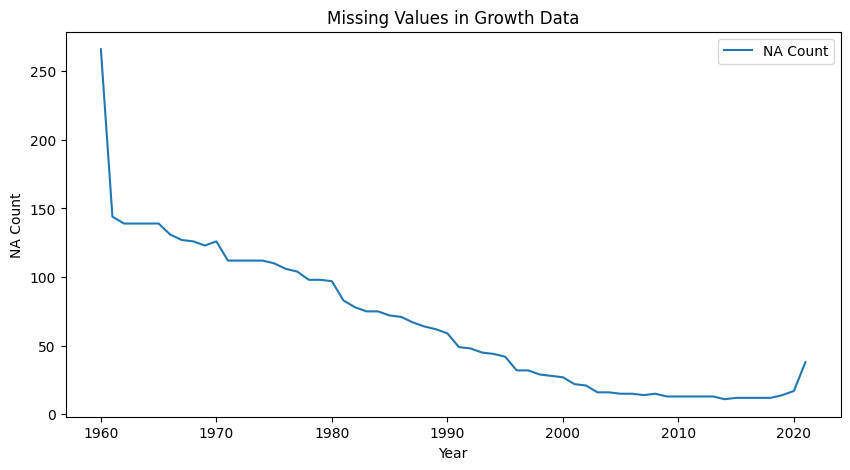

In [146]:
growth_na_values.iloc[4:].plot(kind='line', figsize=(10, 5))
plt.xlabel('Year')
plt.ylabel('NA Count')
plt.title('Missing Values in Growth Data')

NA values seem to decrease after time from 1960, though there seems to be slight increase in 2021

In [119]:
growth['Country Name'].unique()

array(['Aruba', 'Africa Eastern and Southern', 'Afghanistan',
       'Africa Western and Central', 'Angola', 'Albania', 'Andorra',
       'Arab World', 'United Arab Emirates', 'Argentina', 'Armenia',
       'American Samoa', 'Antigua and Barbuda', 'Australia', 'Austria',
       'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso',
       'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas, The',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda',
       'Bolivia', 'Brazil', 'Barbados', 'Brunei Darussalam', 'Bhutan',
       'Botswana', 'Central African Republic', 'Canada',
       'Central Europe and the Baltics', 'Switzerland', 'Channel Islands',
       'Chile', 'China', "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.',
       'Congo, Rep.', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica',
       'Caribbean small states', 'Cuba', 'Curacao', 'Cayman Islands',
       'Cyprus', 'Czechia', 'Germany', 'Djibouti', 'Dominica', 'Denmark',
       'Dominican Republic', 'Algeria',
 

In the growth data, there are some values that are not countries in the first column, including but not limited to Africa Eastern and Southern, Africa Western and Central, Arab World, etc. Seems like the data shows both the country level and aggreate level.

### Examining missing values



In [147]:
missing_prop_debt = debt_filter.isna().sum() / len(debt_filter.index)
missing_prop_debt

DEBT (% of GDP)    0.000000
1960               0.762887
1961               0.757732
1962               0.768041
1963               0.762887
1964               0.762887
1965               0.762887
1966               0.757732
1967               0.742268
1968               0.726804
1969               0.726804
1970               0.530928
1971               0.505155
1972               0.474227
1973               0.438144
1974               0.427835
1975               0.412371
1976               0.407216
1977               0.402062
1978               0.407216
1979               0.402062
1980               0.381443
1981               0.371134
1982               0.350515
1983               0.345361
1984               0.335052
1985               0.324742
1986               0.314433
1987               0.329897
1988               0.324742
1989               0.329897
1990               0.324742
1991               0.293814
1992               0.247423
1993               0.216495
1994               0

The trend seems to show a decreasing amount of NA values as the year progresses, with consecutive years having similar proportion of NA values (e.g. 2012-2015, 1963-1965).
We want to check if the NA proportions are from similar countries or from different countries throughout the years. If it's from the same countries, then it makes sense that as the year passes, data for more and more countries are incorporated.

In [162]:
check = debt_filter[debt_filter.loc[:, ['DEBT (% of GDP)', 1963, 1964, 1965]].isna().any(axis=1)].loc[:,['DEBT (% of GDP)', 1963, 1964, 1965]]
check

,DEBT (% of GDP),1963,1964,1965
1,Afghanistan,NaN,NaN,NaN
2,Albania,NaN,NaN,NaN
3,Algeria,NaN,NaN,NaN
4,Angola,NaN,NaN,NaN
5,Anguilla,NaN,NaN,NaN
...,...,...,...,...
187,Yemen,NaN,NaN,NaN
188,Zambia,NaN,NaN,NaN
189,Zimbabwe,NaN,24.47,29.43
190,Eastern Caribbean Currency Union,NaN,NaN,NaN


Checking the data above, it seems that while most countries have NA values from 1963 to 1965, there are also some countries that have non NA values in 1963 and 64 but NA values on 1965. This shows that there does seem to be gaps in the data and is not an matter of when the data was first recorded for each country (which in this case, the data for each country will not have any NA after an existing record of debt % value).

In [159]:
debt_filter[debt_filter.loc[:, ['DEBT (% of GDP)', 2012, 2013, 2014, 2015]].isna().any(axis=1)].loc[:,['DEBT (% of GDP)', 2012, 2013, 2014, 2015]]

,DEBT (% of GDP),2012,2013,2014,2015
114,Mongolia,NaN,NaN,NaN,NaN
164,Syria,NaN,NaN,NaN,NaN
171,Tonga,NaN,NaN,NaN,NaN


For some reason, data for Mongolia, Syria and Tonga is unavailable from 2012 to 2015.

Let's do the same analysis for the growth data

In [ ]:
missing_prop_growth = growth.isna().sum() / len(growth.index)
missing_prop_growth

Country Name      0.000000
Country Code      0.000000
Indicator Name    0.000000
Indicator Code    0.000000
1960              1.000000
                    ...   
2017              0.045113
2018              0.045113
2019              0.052632
2020              0.063910
2021              0.142857
Length: 66, dtype: float64

The same trend can be found for the growth data, where the proportion of NA values over the year decreases and the proportion of consecutive years is highly correlated with each other.
Interestingly, the 1960 column has 100% NA values.


### Assessing Column names


Let's first change the name of the first column under the debt_filter dataframe with "Country Name" to ensure the same columns are used in both debt_filter and growth_filter.

In [164]:
# Rename the 'DEBT (% of GDP)' column to 'Country Name'
debt_filter.rename(columns={'DEBT (% of GDP)': 'Country Name'}, inplace=True)

In [165]:
debt_filter.columns

Index(['Country Name',           1960,           1961,           1962,
                 1963,           1964,           1965,           1966,
                 1967,           1968,           1969,           1970,
                 1971,           1972,           1973,           1974,
                 1975,           1976,           1977,           1978,
                 1979,           1980,           1981,           1982,
                 1983,           1984,           1985,           1986,
                 1987,           1988,           1989,           1990,
                 1991,           1992,           1993,           1994,
                 1995,           1996,           1997,           1998,
                 1999,           2000,           2001,           2002,
                 2003,           2004,           2005,           2006,
                 2007,           2008,           2009,           2010,
                 2011,           2012,           2013,           2014,
      

For the growth data, we will only choose data from 1960 to 2015 to ensure consistency in time period with debt data

In [166]:
# Pick only the 1st and the Year columns up to 2015
growth_filter = growth.iloc[:, np.r_[0, 4:growth.columns.get_loc('2015')+1]]

In [167]:
growth_filter.head()

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.078431,18.648649,12.129841,3.961402,7.962872,5.882353,7.307692,8.203903,2.547144,1.185788,7.046874,1.991986,1.238042,7.616588,4.195963,-0.957771,1.120879,7.281026,-0.384927,1.138906,3.096722,1.833431,-11.683586,-2.732596,3.366778,-1.035375,6.429817,-0.020479,3.543630
1,Africa Eastern and Southern,NaN,0.239594,7.980768,5.164334,4.579952,5.327717,3.912108,5.256810,4.023776,5.279927,4.700767,5.371653,2.150365,4.437242,5.888690,1.730079,2.846272,1.230744,1.033546,2.795725,5.419382,4.330753,0.508485,0.152353,3.005832,-0.447689,2.286226,4.232451,3.997774,2.897638,-0.039677,0.105301,-1.979118,-0.392300,2.025857,4.290760,5.436661,4.424004,1.848162,2.636486,3.350773,3.658701,3.893379,3.080376,5.508355,6.116801,6.554881,6.604282,4.343456,0.761219,5.152125,3.680870,0.923067,4.200209,3.984387,2.952845
2,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.832278,1.414118,11.229715,5.357403,13.826320,3.924984,21.390528,14.362441,0.426355,12.752287,5.600745,2.724543,1.451315
3,Africa Western and Central,NaN,1.848752,3.770220,7.272440,5.396349,4.049793,-1.787079,-9.546464,1.465775,15.491888,17.908938,10.807494,3.145983,4.213414,10.249839,-2.164265,8.578674,4.726128,-2.194177,5.230813,1.995421,-6.932610,-3.350280,-6.534083,0.559429,5.551610,1.414670,1.448375,4.844253,2.272116,6.562870,1.121080,2.693959,-1.160467,-0.299688,1.927045,4.629045,4.234657,3.506518,1.421003,3.734666,5.212684,9.899548,5.518474,8.013453,5.848364,5.374482,5.530899,6.279223,6.274498,6.957030,4.848333,5.142997,6.104192,5.927355,2.745894
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.400001,0.000000,4.200001,6.000002,3.499999,2.900002,4.082749,6.128890,0.041621,-3.450099,0.991359,-5.838281,-23.983417,1.339363,15.000000,13.544370,7.274277,4.691146,2.181490,3.054624,4.205999,13.665689,2.990000,10.950000,15.030000,11.550000,14.010000,11.170000,0.860000,4.860000,3.470000,8.540000,4.950000,4.820000,0.940000


In [168]:
# check that the shape[1] values for both debt_filter and growth_filter are the same
print(debt_filter.shape)
print(growth_filter.shape)

(194, 57)
(266, 57)



### Assessing variable type


Ensure that the column name types for both debt_filter and growth_filter are strings

In [169]:
# Change the columns type to string
debt_filter.columns = debt_filter.columns.astype(str)
growth_filter.columns = growth_filter.columns.astype(str)

Let's also check that both the column types under debt_filter and growth_filter are float, which is what we expect and want for percentage values.

In [170]:
debt_filter.dtypes

Country Name     object
1960            float64
1961            float64
1962            float64
1963            float64
1964            float64
1965            float64
1966            float64
1967            float64
1968            float64
1969            float64
1970            float64
1971            float64
1972            float64
1973            float64
1974            float64
1975            float64
1976            float64
1977            float64
1978            float64
1979            float64
1980            float64
1981            float64
1982            float64
1983            float64
1984            float64
1985            float64
1986            float64
1987            float64
1988            float64
1989            float64
1990            float64
1991            float64
1992            float64
1993            float64
1994            float64
1995            float64
1996            float64
1997            float64
1998            float64
1999            float64
2000            

In [171]:
growth_filter.dtypes

Country Name     object
1960            float64
1961            float64
1962            float64
1963            float64
1964            float64
1965            float64
1966            float64
1967            float64
1968            float64
1969            float64
1970            float64
1971            float64
1972            float64
1973            float64
1974            float64
1975            float64
1976            float64
1977            float64
1978            float64
1979            float64
1980            float64
1981            float64
1982            float64
1983            float64
1984            float64
1985            float64
1986            float64
1987            float64
1988            float64
1989            float64
1990            float64
1991            float64
1992            float64
1993            float64
1994            float64
1995            float64
1996            float64
1997            float64
1998            float64
1999            float64
2000            


### Assessing data completeness


Since the data is formatted where each row corresponds to the annual percentage of either debt to gdp ratio or gdp growth rate for each country. We can safely assume that each country will have a value for each year (i.e. 1960 onwards). Hence we can try to unpivot the year columns and create a table for both debt and growth where each row corresponds to the value of either the debt to gdp ratio or gdp growth rate of a certain country on a certain year. 

In [172]:
# for debt_filter, below will be the number of rows in the transformed table
debt_filter.shape[0] * debt_filter.shape[1]

11058

In [174]:
# for growth_filter, below will be the number of rows in the transformed table
growth_filter.shape[0] * growth_filter.shape[1]

15162

In [ ]:
# compare the country name under debt filter and growth filter to understand how much 
# country name should be replace
growth_names = pd.DataFrame({"Country Names" :sorted(growth_filter['Country Name'].unique())})
debt_names = pd.DataFrame({"Country Names" : sorted(debt_filter['Country Name'].unique())})

In [ ]:
# Merge under debt since debt has a lower country count
result = debt_names.merge(growth_names, how='left', on='Country Names', indicator=True)

In [ ]:
# Show the country names that are in debt but not in growth
result[result['_merge']=='left_only']['Country Names']

4                              Anguilla
35          China, People's Republic of
38              Congo, Dem. Rep. of the
39                  Congo, Republic of 
43                       Czech Republic
44                        Côte d'Ivoire
49     Eastern Caribbean Currency Union
51                                Egypt
62                        G-20 Advanced
63                        G-20 Emerging
77                        Hong Kong SAR
82                                 Iran
93                   Korea, Republic of
97                           Lao P.D.R.
104                          Low Income
116          Micronesia, Fed. States of
130                    North Macedonia 
146               Saint Kitts and Nevis
147                         Saint Lucia
148    Saint Vincent and the Grenadines
161            South Sudan, Republic of
168                               Syria
169               São Tomé and Príncipe
170            Taiwan Province of China
178                              Turkey


In [ ]:
# Show the fully sorted list of countries under growth_filter
sorted(growth_filter['Country Name'].unique())

['Afghanistan',
 'Africa Eastern and Southern',
 'Africa Western and Central',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Arab World',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas, The',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Caribbean small states',
 'Cayman Islands',
 'Central African Republic',
 'Central Europe and the Baltics',
 'Chad',
 'Channel Islands',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Early-demographic dividend',
 'East

Replace the following countries in the growth data set accordingly <br>
{'Country Name Under Growth Data Set' : 'Updated country name'}
<br>
{'China' : 'China, People's Republic of',
'Congo, Dem. Rep.': 'Congo, Dem. Rep. of the',
'Congo, Rep.' : 'Congo, Republic of',
'Czechia' : 'Czech Republic',
"Cote d'Ivoire" : "Côte d'Ivoire",
'Egypt, Arab Rep.' : 'Egypt',
'Hong Kong SAR, China' : 'Hong Kong SAR',
'Iran, Islamic Rep.' : 'Iran',
'Korea, Rep.' : 'Korea, Republic of',
'Lao PDR' : 'Lao P.D.R.',
'Micronesia, Fed. Sts.' : 'Micronesia, Fed. States of',
'North Macedonia' : 'North Macedonia ',
'St. Kitts and Nevis' : 'Saint Kitts and Nevis',
'St. Lucia' : 'Saint Lucia',
'St. Vincent and the Grenadines' : 'Saint Vincent and the Grenadines',
'South Sudan' : 'South Sudan, Republic of',
'Syrian Arab Republic' : 'Syria',
'Sao Tome and Principe' : 'São Tomé and Príncipe',
'Turkiye' : 'Turkey',
'Venezuela, RB' : 'Venezuela’,
'Yemen, Rep.' : 'Yemen'}

In [ ]:
# double check that replacing the country names can indeed result in the merging of the two dataframes
growth_names.replace({'China' : "China, People's Republic of",
'Congo, Dem. Rep.': 'Congo, Dem. Rep. of the',
'Congo, Rep.' : 'Congo, Republic of',
'Czechia' : 'Czech Republic',
"Cote d'Ivoire" : "Côte d'Ivoire",
'Egypt, Arab Rep.' : 'Egypt',
'Hong Kong SAR, China' : 'Hong Kong SAR',
'Iran, Islamic Rep.' : 'Iran',
'Korea, Rep.' : 'Korea, Republic of',
'Lao PDR' : 'Lao P.D.R.',
'Micronesia, Fed. Sts.' : 'Micronesia, Fed. States of',
'North Macedonia' : 'North Macedonia ',
'St. Kitts and Nevis' : 'Saint Kitts and Nevis',
'St. Lucia' : 'Saint Lucia',
'St. Vincent and the Grenadines' : 'Saint Vincent and the Grenadines',
'South Sudan' : 'South Sudan, Republic of',
'Syrian Arab Republic' : 'Syria',
'Sao Tome and Principe' : 'São Tomé and Príncipe',
'Turkiye' : 'Turkey',
"Venezuela, RB" : 'Venezuela',
"Yemen, Rep." : 'Yemen'}, inplace=True)

In [260]:
result_2 = debt_names.merge(growth_names, how='inner', on='Country Names')

From the test above we can see that we have to modify some country names under Growth table to ensure that the tables can be combined, resulting in a total of 186 country from both data set.


## Step 4: Clean and pre-process the data


In [ ]:
# pd.melt(df, id_vars=['A'], value_vars=['B'], var_name='myVarname', value_name='myValname')

In [7]:
# load the functions I wrote
from functions.debt_cleaner import debt_cleaner

In [8]:
debt_clean = debt_cleaner(debt, 1960, 2015)

/Users/kevinkyhalim/ML_repo/1. Learning/Veridical Data Science/4. Data Cleaning/growth_debt/functions/debt_cleaner.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  debt_clean = data.loc[:,:].replace(replace_dict)


In [9]:
debt_clean.head()

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,280.98,273.47,243.44,204.03,23.02,20.24,18.37,16.78,7.90,7.14,6.63,6.75,6.38,6.25
2,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.17,75.04,76.67,81.87,71.86,63.88,64.60,60.61,64.10,60.24,57.47,58.20,56.69,53.55,55.14,59.67,57.72,59.41,62.14,70.39,72.04,73.32
3,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.04,31.83,27.51,33.39,32.52,36.62,43.31,54.45,70.35,65.2,55.6,44.73,44.51,46.76,47.32,47.05,60.54,69.33,83.43,78.41,69.04,71.65,70.11,97.51,97.97,94.32,79.19,75.82,79.78,72.20,61.25,59.80,59.40,50.65,39.34,28.55,24.30,13.61,8.39,10.16,10.87,9.49,9.49,7.74,7.96,9.06
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,222.09,147.94,118.14,154.95,165.25,89.90,80.17,72.97,59.77,51.95,35.74,18.70,16.07,16.65,22.71,44.29,33.80,29.49,32.87,40.66,64.24
5,Anguilla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.13,10.56,12.25,11.68,15.99,17.45,14.04,14.04,15.40,25.10,32.50,29.21,30.94,30.42,24.11,22.15


In [21]:
from functions.growth_cleaner import growth_cleaner
growth_clean = growth_cleaner(growth, 1960, 2015)

In [22]:
# Check that the country names have changed, check by seeing if Yemen, Rep. is now Yemen
growth_clean.tail()

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
261,Kosovo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.034884,4.939924,6.319886,1.712195,5.340908,3.348804,5.916270
262,Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.293494,8.207598,4.001966,6.721949,5.669371,4.634967,5.231112,6.006695,3.775530,6.181916,3.803646,3.935232,3.747398,3.972696,5.591748,3.170409,3.338428,3.647569,3.866230,7.702307,-12.714823,2.392886,4.823415,-0.188574,-27.994546
263,South Africa,NaN,3.844734,6.177931,7.373709,7.939609,6.122798,4.438386,7.196523,4.153373,4.715903,5.248661,4.278934,1.654830,4.571945,6.111122,1.695434,2.249860,-0.093979,3.014480,3.790519,6.620583,5.360791,-0.383419,-1.846558,5.099152,-1.211541,0.017849,2.100729,4.200110,2.394795,-0.317760,-1.018245,-2.137033,1.233558,3.200000,3.100000,4.300000,2.600000,0.500000,2.400000,4.200000,2.700000,3.700374,2.949075,4.554560,5.277052,5.603806,5.360474,3.191044,-1.538089,3.039733,3.168556,2.396232,2.485468,1.413826,1.321862
264,Zambia,NaN,1.361382,-2.490839,3.272393,12.214048,16.647456,-5.570310,7.919697,1.248330,-0.436916,4.797113,-0.086040,9.208865,-0.962049,6.428159,-2.269329,6.220975,-4.564236,0.553764,-3.023931,3.035622,6.167957,-2.812783,-1.966689,-0.336835,1.615310,0.723894,2.675662,6.280749,-1.023502,-0.481072,-0.036133,-1.730922,6.797274,-8.625442,2.897669,6.218546,3.814007,-0.385746,4.650190,3.897323,5.316868,4.506014,6.944974,7.032395,7.235599,7.903694,8.352436,7.773896,9.220348,10.298223,5.564602,7.597593,5.057232,4.697992,2.920375
265,Zimbabwe,NaN,6.316157,1.434471,6.244345,-1.106172,4.910571,1.523130,8.367009,1.970135,12.428236,22.565151,8.917587,8.329775,2.604715,6.625154,-1.931223,0.464839,-6.860703,-2.706922,3.297035,14.420684,12.525425,2.634297,1.585305,-1.907360,6.944388,2.099029,1.150737,7.552375,5.199766,6.988553,5.531782,-9.015570,1.051459,9.235199,0.158026,10.360697,2.680594,2.885212,-0.817821,-3.059190,1.439615,-8.894024,-16.995075,-5.807538,-5.711084,-3.461495,-3.653327,-17.668946,12.019560,19.675323,14.193913,16.665429,1.989493,2.376929,1.779873


In [23]:
# Now merge both the cleaned debt and growth dataframes using the debt_growth_merger function
from functions.debt_growth_merger import debt_growth_merger

merged_data = debt_growth_merger(debt_clean, growth_clean)

In [24]:
# Check the first 10 data for Australia
merged_data[merged_data['country'] == 'Australia'].head(10)

,country,year,debt-pct-gdp,growth-pct-gdp
392,Australia,1960,31.47,NaN
393,Australia,1961,30.31,2.483271
394,Australia,1962,30.42,1.294468
395,Australia,1963,29.32,6.214949
396,Australia,1964,27.65,6.978540
397,Australia,1965,NaN,5.980893
398,Australia,1966,41.23,2.381966
399,Australia,1967,39.25,6.303650
400,Australia,1968,38.21,5.095103
401,Australia,1969,35.73,7.043526


In [34]:
# Group by the country and calculate the correlation between debt-pct-gdp to growth-pct-gdp column
correlation = merged_data.groupby('country')[['debt-pct-gdp', 'growth-pct-gdp']].corr().iloc[0::2, -1].reset_index().iloc[:,np.r_[0,2]]

In [35]:
correlation.head()

,country,growth-pct-gdp
0,Afghanistan,-0.067977
1,Albania,-0.160030
2,Algeria,-0.181069
3,Angola,0.074037
4,Antigua and Barbuda,-0.034061


In [36]:
correlation.columns = ['country', 'correlation']

In [37]:
correlation

,country,correlation
0,Afghanistan,-0.067977
1,Albania,-0.160030
2,Algeria,-0.181069
3,Angola,0.074037
4,Antigua and Barbuda,-0.034061
...,...,...
182,Venezuela,-0.194899
183,Vietnam,0.538652
184,Yemen,0.175981
185,Zambia,-0.374517


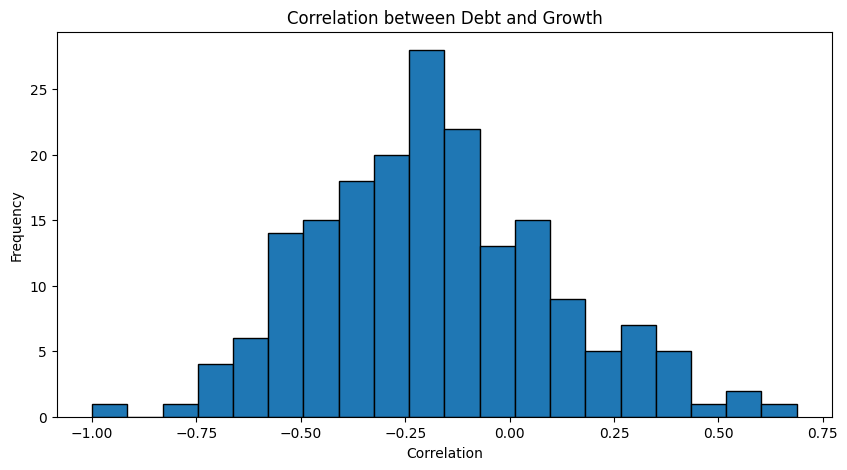

In [41]:
# plot a histogram of the correlation values
plt.figure(figsize=(10, 5))
plt.hist(correlation['correlation'], bins=20, edgecolor='black')
plt.xlabel('Correlation')
plt.ylabel('Frequency')
plt.title('Correlation between Debt and Growth')
plt.show()